# Testing Our Dog Breed Classifier Model

After training our model, we exported the calculated weights so we can test individual samples from our test data.

In [2]:
#import necessary libraries and load model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from keras.preprocessing import image
from keras.applications.inception_resnet_v2 import preprocess_input, decode_predictions
from keras.models import load_model
import pickle

model = load_model('model.h5')

/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
#reads csv file of test data
breeds = pd.read_csv("sample_submission.csv")

In [48]:
#loads one image; index between 0 and 10356
img = breeds['id'][50]


#preprocesses image - normalizes pixel values
mage = image.load_img("test/" + img + ".jpg", target_size=(299, 299))


data = image.img_to_array(mage)
data = preprocess_input(np.expand_dims(mage, axis = 0))

y_pred = model.predict(data)
with open('encoder.pkl','rb') as f:
    one_hot = pickle.load(f)
    f.close()
y_pred

/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.20.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


array([[3.7867470e-10, 9.0933247e-11, 1.0129784e-09, 1.3043736e-10,
        7.2125107e-04, 3.9343344e-05, 1.6117251e-10, 3.3657347e-05,
        2.0867801e-06, 1.4458763e-03, 2.3318185e-09, 2.9530858e-09,
        1.9869464e-09, 6.0621455e-06, 1.1276834e-10, 2.7407691e-06,
        1.5864600e-09, 5.9107275e-09, 7.8422161e-08, 3.2120502e-09,
        2.2903833e-13, 3.4172524e-06, 2.2223622e-11, 6.7834740e-12,
        2.4215848e-04, 1.7388672e-08, 6.3056643e-14, 2.0600593e-05,
        1.0331349e-09, 8.3025320e-10, 1.2406872e-12, 2.8007729e-12,
        2.0220266e-10, 1.1609514e-05, 5.6196983e-12, 1.3538081e-11,
        6.2390590e-08, 1.3673174e-08, 1.9922429e-10, 5.8135778e-01,
        4.7518216e-09, 1.6096285e-08, 1.0248986e-03, 2.0078319e-08,
        8.2477282e-11, 4.0382742e-10, 4.1432355e-10, 4.0131201e-10,
        8.9857988e-13, 4.8125508e-09, 3.9288277e-12, 2.9416080e-08,
        3.0471375e-11, 1.0343712e-05, 2.7277451e-11, 1.7089032e-07,
        6.0146554e-11, 2.9631641e-08, 8.5004712e

In [49]:
#returns predicted breed based on output from model
def un_onehot(data):
    breed = one_hot.inverse_transform(data)
    return breed

In [50]:
#extracts dog's actual breed
breed_actual=np.argmax(y_pred)
breed_actual

breeds_1 = breeds.iloc[0]
breeds_1.to_frame()
breed_list = np.delete(breeds_1.index.values, 0)
breed_list[breed_actual]

'english_foxhound'

In [51]:
#calculates predicted breed
breed_pred = un_onehot(y_pred)
breed_pred

array(['english_foxhound'], dtype='<U30')

Predicted Breed: english_foxhound
Actual Breed: english_foxhound


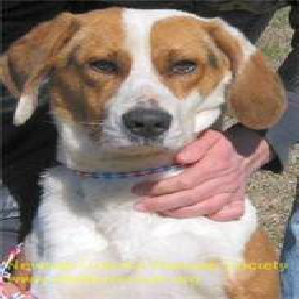

In [52]:
print("Predicted Breed: " + breed_pred[0])
print("Actual Breed: " + breed_list[breed_actual])

mage